# Tabla de Contenido
1. [Introducción](#introducción)
    - [Integrantes](#integrantes)
    - [Objetivo General](#Objetivo-General)
    - [Objetivo Específicos](#Objetivo-Específicos)
    - [Descripción del Problema](#descripción-del-problema)
    - [Flujo de Trabajo a Realizar](#flujo-de-trabajo-a-realizar)
2. [Setup e Importación de Librerías](#setup-e-importación-de-librerías)
    - [Recolección de Datos](#recolección-de-datos)
    - [Análisis](#análisis)
3. [Loading the Data](#loading-the-data)
4. [Data Preparation](#data-preparation)
5. [Exploratory data analysis to get familiar with the data](#Exploratory-data-analysis-to-get-familiar-with-the-data)
6. [Feature Extraction](#Feature-Extraction)
7. [Manual Topic Modeling](#Manual-Topic-Modeling)
8. [Conclusiones finales](#Conclusión-finales)




# **1.Introducción**

En un entorno empresarial competitivo, la satisfacción del cliente es fundamental, y una gestión eficiente de las quejas es clave para lograrla. Este proyecto busca desarrollar un modelo de clasificación que organice automáticamente las quejas de los clientes según los productos o servicios relacionados. Al categorizar los tickets de manera precisa, las empresas pueden priorizar y redirigir rápidamente cada caso al equipo adecuado, mejorando los tiempos de respuesta y optimizando la resolución de problemas. Este enfoque no solo eleva la eficiencia operativa, sino que también refuerza la confianza del cliente al demostrar un compromiso proactivo con sus necesidades.
##**1.1 Integrantes**
* Virginia Mercedes Fernández Daza (fernandez.vm@gmail.com)
* Marco Antonio Velasquez Rocha (Marco.velasquez@gmail.com)
* Ivan Israel Machicado Quiroga(machicado.ivan@gmail.com) ...

##**1.2 Objetivo General**

Desarrollar un modelo basado en técnicas de Procesamiento de Lenguaje Natural, para clasificar de manera eficiente y precisa las quejas de los clientes en cinco categorías principales: tarjetas de crédito/tarjetas de prepago, servicios de cuentas bancarias, reporte de robo/disputa, hipotecas/préstamos y otros, de tal forma que este modelo permitirá optimizar el sistema de tickets de atención al cliente, facilitando la identificación rápida de problemas, mejorando la oferta de servicios y fortaleciendo la capacidad de respuesta de la empresa Financiera.

##**1.3	Objetivos Específicos**

•	Cargar y preparar los datos: Realizar la carga y organización de los datos de texto provenientes de los tickets de atención al cliente, garantizando su correcta disposición para las etapas de procesamiento y análisis.
•	Implementar técnicas de limpieza y normalización de texto, como la eliminación de ruido, tokenización, lematización y eliminación de palabras irrelevantes, para asegurar que los datos sean adecuados para su análisis.
•	Realizar un análisis exploratorio de datos (EDA): analizar las características de los datos, como la distribución de palabras, frecuencias y patrones, para obtener una comprensión inicial de las quejas y su contenido.
•	Aplicar métodos de extracción de características, como la representación TF-IDF o embeddings, para transformar los datos textuales en un formato numérico utilizable en el modelado.
•	Utilizar factorización de matrices no negativas (NMF) para identificar y clasificar las quejas en cinco grupos principales relacionados con productos y servicios financieros.
•	Construir modelos utilizando aprendizaje supervisado: Diseñar modelos estadísticos y de aprendizaje supervisado que complementen el modelado de temas, permitiendo una clasificación precisa de los tickets.
•	Entrenar los modelos propuestos utilizando los datos disponibles, evaluando su desempeño mediante métricas relevantes como precisión, recall y f1-score.

##**1.5 Descripcion del Problema**

Debe crear un modelo que pueda clasificar las quejas (complaints) de los clientes en función de los productos/servicios. Al hacerlo, puede segregar estos tickets en sus categorías relevantes y, por lo tanto, ayudar en la resolución rápida del problema.

Realizará el modelado de temas en los datos <b>.json</b> proporcionados por la empresa. Dado que estos datos no están etiquetados, debe aplicar NMF para analizar patrones y clasificar los tickets en los siguientes cinco grupos según sus productos/servicios:

* Tarjetas de Credito / Tarjetas Prepagadas (Credit card / Prepaid Card)

* Servicios de Cuentas de Banco (Bank account services)

* Reportes de Robos (Theft/Dispute reporting)

* Prestamos Hipotecarios y Otros Prestamos (Mortgages/loans)

* Otros

Con la ayuda del modelado de temas, podrá asignar cada ticket a su respectivo departamento/categoría. Luego puede usar estos datos para entrenar cualquier modelo supervisado, como regresión logística, árbol de decisión o bosque aleatorio. Usando este modelo entrenado, puede clasificar cualquier nuevo ticket de soporte de quejas de clientes en su departamento correspondiente.

##**1.6 Flujo de Trajajo a Realizar:**

Debe realizar las siguientes ocho tareas principales para completar la tarea:

1. Data Loading

2. Text preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature Extraction

5. Topic modeling

6. Model building using Supervised Learning

7. Model training and evaluation

8. Model inference

#2. **Setup e Importacion de Librerias**

In [ ]:
## SpaCy and en_core_web_sm installation
!pip install spacy

In [ ]:
##run the following command in the console
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import re, string

# Import NLTK libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import Spacy libraries
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

**NLTK (Natural Language Toolkit), una biblioteca en Python para realizar tareas de procesamiento de lenguaje natural (NLP). **

In [ ]:
# Download NLTK resources

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## **3. Loading the data**

Los datos están en formato JSON y necesitamos convertirlos a un dataframe.
Se esta descargando un archivo JSON desde una URL de Google Drive usando la biblioteca requests, lo guardas localmente como complaints.json, luego se carga en Python utilizando json.load() y finalmente se convierten los datos JSON en un DataFrame de pandas para facilitar su análisis.

In [ ]:
import requests
# URL del archivo JSON en Google Drive compartido
url = 'https://drive.usercontent.google.com/download?id=1DFXAgFeZbOjYey59IFF1umyVx233LPOS&export=download&authuser=0&confirm=t&uuid=0fa3b723-7c61-432a-98ec-249c893c6fac&at=AENtkXYAwku0EbA2lF9lSL1fGUk0:1732037779732'

# Hacer la solicitud para obtener los datos
response = requests.get(url)

# Guardar el contenido descargado en un archivo local
with open('complaints.json', 'wb') as file:
    file.write(response.content)

# Cargar el archivo JSON usando json.load()
with open('complaints.json', 'r') as json_file:
    datos_json = json.load(json_file)

# Convertir los datos cargados a un DataFrame
df = pd.json_normalize(datos_json)

In [ ]:
df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


## **5. Data preparation**

In [ ]:
# Inspect the dataframe to understand the given data.
print(df.head(5))

                _index      _type      _id  _score   _source.tags  \
0  complaint-public-v2  complaint  3211475     0.0           None   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember   
2  complaint-public-v2  complaint  3199379     0.0           None   
3  complaint-public-v2  complaint  2673060     0.0           None   
4  complaint-public-v2  complaint  3203545     0.0           None   

  _source.zip_code _source.complaint_id                       _source.issue  \
0            90301              3211475   Attempts to collect debt not owed   
1            319XX              3229299     Written notification about debt   
2            77069              3199379  Other features, terms, or problems   
3            48066              2673060      Trouble during payment process   
4            10473              3203545                    Fees or interest   

       _source.date_received _source.state  ... _source.company_response  \
0  2019-04-13T12:00:00-05:00      

In [ ]:
df.shape

(78313, 22)

1.	<class 'pandas.core.frame.DataFrame'>: Indica que el objeto es un DataFrame de pandas.
2.	RangeIndex: 78313 entries, 0 to 78312: Hay 78,313 filas (entradas) en el DataFrame, numeradas del 0 al 78,312.
3.	Data columns (total 22 columns): El DataFrame tiene un total de 22 columnas.
4.	Column: Esta es la lista de las columnas en el DataFrame, junto con información sobre cuántos valores no nulos hay en cada columna y el tipo de dato de cada columna.
o	Non-Null Count: Muestra cuántos valores no nulos hay en cada columna. Por ejemplo, en la columna _source.tags, solo hay 10,900 valores no nulos, lo que significa que hay muchos valores faltantes.
o	Dtype: Indica el tipo de dato de cada columna. En este caso, la mayoría son de tipo object (que generalmente representa texto), y hay una columna de tipo float64 (que representa números decimales).
5.	memory usage: 13.1+ MB: Indica que el DataFrame utiliza aproximadamente 13.1 megabytes de memoria.
Si necesitas más detalles sobre alguna parte específica del DataFrame o cómo trabajar con él, ¡dímelo!


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [ ]:
#print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [ ]:
#Assign new column names
df.columns = df.columns.str.replace('_source.', '', regex=False)
# Reemplazamos el nombre de la columna
df.rename(columns={'complaint_what_happened': 'complaints'}, inplace=True)

In [ ]:
print(df.columns)

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely', 'complaints',
       'sub_issue', 'consumer_consent_provided'],
      dtype='object')



df.columns: Esto accede a los nombres de las columnas del DataFrame df.
.str.replace('_source.', '', regex=False): Este método verifica cada nombre de columna y sustituye la subcadena '_source.' por una cadena vacía (''), es decir, elimina esta parte del nombre.
regex=False: Esto indica que la búsqueda y reemplazo se debe hacer como una coincidencia exacta de la cadena, no usando expresiones regulares.
Asignación: El resultado de esta operación se vuelve a asignar a df.columns, actualizando así los nombres de las columnas en el DataFrame.
Por ejemplo, si un nombre de columna era _source.issue, después de esta operación, se convertirá en issue.

2. Reemplazar el nombre de una columna específica
python
df.rename(columns={'complaint_what_happened': 'complaints'}, inplace=True)  
df.rename(columns={'complaint_what_happened': 'complaints'}, inplace=True): Este método se usa para renombrar columnas específicas del DataFrame.
columns={'complaint_what_happened': 'complaints'}: Aquí se está especificando que quieres cambiar el nombre de la columna complaint_what_happened a complaints.
inplace=True: Esto significa que la operación se realiza directamente sobre el DataFrame df, sin necesidad de crear una copia. Si inplace fuera False, deberías guardar el resultado en una nueva variable.
Resumen
En resumen, este código:

Elimina la parte '_source.' de cada nombre de columna en el DataFrame df.
Cambia el nombre de la columna complaint_what_happened a complaints.

In [ ]:
#Assign nan in place of blanks in the complaints column
df['complaints'] = df['complaints'].replace('', np.nan)

In [ ]:
#Remove all rows where complaints column is nan
df = df.dropna(subset=['complaints'])

In [ ]:
df.shape

(21072, 22)

## Prepare the text for topic modeling

Una vez que haya eliminado todas las quejas en blanco, debe:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers

Una vez que haya realizado estas operaciones de limpieza, debe realizar lo siguiente:

* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [ ]:
# Funcion para limpieza y preproceso del texto
# Function to preprocess text
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar texto entre corchetes
    text = re.sub(r'\[.*?\]', '', text)

    # Eliminar palabras que contengan números
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # Eliminar texto que contenga "xx", "xxx" o "xxxx"
    text = re.sub(r'\b\w*xx\w*\b|\b\w*xxx\w*\b|\b\w*xxxx\w*\b', '', text)

    # Eliminar puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Eliminar espacios en blanco adicionales
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['complaints'] = df['complaints'].apply(preprocess_text)

Interpretación:
Primero, limpias el texto eliminando quejas en blanco, convirtiéndolo a minúsculas, quitando texto en corchetes, eliminando puntuación y palabras con números.
Luego, aplicas lematización y extraes las etiquetas de partes del habla, manteniendo solo las palabras que son sustantivos

In [ ]:
print(df['complaints'].head(10))

1     good morning my name is and i appreciate it if...
2     i upgraded my card in and was told by the agen...
10    chase card was reported on however fraudulent ...
11    on while trying to book a ticket i came across...
14    my grand son give me check for i deposit it in...
15                        can you please remove inquiry
17    with out notice jp morgan chase restricted my ...
20    during the summer months i experience a declin...
21    on i made a payment to an online retailer usin...
23    i have a chase credit card which is incorrectl...
Name: complaints, dtype: object


In [ ]:
df_clean = df[['complaints']]
df_clean['complaint_clean'] = df_clean['complaints']

In [ ]:
# Write your function to Lemmatize the texts
# Cargar el modelo
nlp = spacy.load('en_core_web_sm')

# Función para lematizar el texto
def lematizar_texto(texto):
    doc = nlp(texto)
    # Devolver los lemas de las palabras, combinados como una cadena
    return " ".join([token.lemma_ for token in doc])

# Aplicar la lematización a la columna 'complaint_what_happened'
df['complaint_lemmatized'] = df['complaints'].apply(lematizar_texto)

Cargar el modelo de spaCy:

Se carga un modelo de lenguaje llamado en_core_web_sm de spaCy, que es un modelo preentrenado para el idioma inglés. Este modelo incluye herramientas para analizar y procesar texto, como el análisis sintáctico y la lematización, que es el proceso de reducir las palabras a su forma base.
Definir una función:

Se crea una función que se encargará de lematizar el texto. Esta función toma un texto como entrada, representado como un string.
Procesar el texto de entrada:

Dentro de la función, el texto se procesa utilizando el modelo de spaCy. Este procesamiento tiene como resultado una estructura de datos que contiene información sobre cada palabra del texto, permitiendo acceder a diversos atributos lingüísticos de cada palabra (como su forma base).
Obtener lemas:

Se extraen los lemas de cada palabra procesada. El lema es la forma básica de una palabra. Por ejemplo, los lemas de "caminando" y "caminé" serían "caminar". Todos los lemas se agrupan para formar una nueva cadena de texto.
Aplicar la función a datos en un DataFrame:

Finalmente, se utiliza la función de lematización para procesar cada queja contenida en una columna de un DataFrame. El resultado de este procesamiento se almacena en una nueva columna que contendrá las versiones lematizadas de las quejas originales.

In [ ]:
# Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints
df_clean[['complaints', 'complaint_lemmatized']] = df[['complaints', 'complaint_lemmatized']]
df_clean['complaint_clean'] = df_clean['complaint_lemmatized']

Interpretación:

En resumen, este fragmento de código está realizando las siguientes acciones:

Primera línea: Copia las columnas complaints y complaint_lemmatized del DataFrame original df al nuevo DataFrame df_clean.
Segunda línea: Crea una nueva columna en df_clean que es una copia directa de la columna complaint_lemmatized.
Esto permite que df_clean tenga tanto las quejas originales como las lematizadas, y también añade una nueva columna para facilitar el acceso o la referencia a las quejas lematizadas bajo un nombre diferente. Si necesitas más aclaraciones o información adicional, ¡házmelo saber!

In [ ]:
df_clean

,complaints,complaint_clean,complaint_lemmatized
1,good morning my name is and i appreciate it if...,good morning my name be and I appreciate it if...,good morning my name be and I appreciate it if...
2,i upgraded my card in and was told by the agen...,I upgrade my card in and be tell by the agent ...,I upgrade my card in and be tell by the agent ...
10,chase card was reported on however fraudulent ...,chase card be report on however fraudulent app...,chase card be report on however fraudulent app...
11,on while trying to book a ticket i came across...,on while try to book a ticket I come across an...,on while try to book a ticket I come across an...
14,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,my grand son give I check for I deposit it int...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,after be a chase card customer for well over a...
78309,on wednesday i called chas my visa credit card...,on wednesday I call chas my visa credit card p...,on wednesday I call chas my visa credit card p...
78310,i am not familiar with pay and did not underst...,I be not familiar with pay and do not understa...,I be not familiar with pay and do not understa...
78311,i have had flawless credit for yrs ive had cha...,I have have flawless credit for yrs I ve have ...,I have have flawless credit for yrs I ve have ...


In [ ]:
#Write your function to extract the POS tags

# Función para extraer las etiquetas POS de un texto
def pos_tag(texto):
    doc = nlp(texto)
    # Extraer la etiqueta POS de cada token en el texto
    pos_tags = [token.pos_ for token in doc]
    return pos_tags  # Devuelve una lista de etiquetas POS

# Aplicar la función a una columna del DataFrame y crear la columna 'complaint_pos_tags'
df['complaint_pos_tags'] = df['complaint_lemmatized'].apply(pos_tag)


                                              complaints  \
1      good morning my name is and i appreciate it if...   
2      i upgraded my card in and was told by the agen...   
10     chase card was reported on however fraudulent ...   
11     on while trying to book a ticket i came across...   
14     my grand son give me check for i deposit it in...   
...                                                  ...   
78303  after being a chase card customer for well ove...   
78309  on wednesday i called chas my visa credit card...   
78310  i am not familiar with pay and did not underst...   
78311  i have had flawless credit for yrs ive had cha...   
78312  roughly years ago i closed out my accounts wit...   

                                   complaint_POS_removed  
1      morning name stop bank cardmember service ask ...  
2      card agent anniversary date agent information ...  
10     chase card report application identity consent...  
11     ticket offer ticket reward card info

En resumen, este código realiza lo siguiente:

Define una función pos_tag que extrae etiquetas de partes del discurso de un texto dado.
Procesa el texto usando spaCy para crear un objeto estructurado que permite analizar las palabras.
Extrae las etiquetas POS de cada palabra en el texto y las devuelve como una lista.
Aplica esta función a una columna de un DataFrame y almacena el resultado en una nueva columna, complaint_pos_tags, que contendra las etiquetas gramaticales correspondientes a las quejas lematizadas.

In [ ]:
df['complaint_pos_tags']

,complaint_pos_tags
1,"[SPACE, NOUN, ADP, NOUN, ADP, PRON, NOUN]"
2,"[SPACE, VERB, DET, NOUN, ADP, DET, NOUN, PRON,..."
10,"[SPACE, ADV, SPACE, ADJ, NOUN, AUX, AUX, VERB,..."
11,"[SPACE, PRON, AUX, ADV, AUX, VERB, ADP, PRON, ..."
14,"[SPACE, ADP, NOUN]"
...,...
78303,"[SPACE, NOUN, CCONJ, VERB, PART, VERB, NOUN, N..."
78309,"[SPACE, VERB, ADP, PRON, SPACE, CCONJ, PRON, V..."
78310,"[SPACE, VERB, NOUN, NOUN, ADP, DET, NOUN, SPAC..."
78311,"[SPACE, PRON, VERB, PRON, ADV, SPACE, NOUN, SP..."


In [ ]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
# Function to lemmatize and filter by POS tags
def lemmatize_and_filter_nouns(text):
    doc = nlp(text)
    # Keep only nouns (tag == "NN") and lemmatize them
    nouns_lemmatized = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    # Return as a single string
    return " ".join(nouns_lemmatized)

# Assuming df is your DataFrame with a 'complaints' column
df['complaint_POS_removed'] = df['complaints'].apply(lemmatize_and_filter_nouns)

# Display the updated DataFrame
print(df[['complaints', 'complaint_POS_removed']])

                                              complaints  \
1                       thanks in advance for your help    
2       has the recording of the agent who was misled...   
10        however  fraudulent application have been s...   
11        this is now being reported in my credit rep...   
14                                            with chase   
...                                                  ...   
78303   enrollment and failed to credit airline charg...   
78309   sent to me  and she said that she is not an a...   
78310   integrated banking apps to the public  i unde...   
78311      they offer everyone else    terms  they ch...   
78312   in order to close out an unsecured line of cr...   

                                   complaint_POS_removed  
1                                     thank advance help  
2                                        recording agent  
10     application identity consent service credit id...  
11     credit report chase information cred

En resumen, el código realiza las siguientes acciones:

Define una función lemmatize_and_filter_nouns que lematiza el texto y filtra para mantener solo los sustantivos.
Procesa cada queja en la columna complaints del DataFrame utilizando spaCy.
Filtra todas las palabras, conservando solo los sustantivos lematizados en un nuevo string.
Almacena estos resultados en una nueva columna complaint_POS_removed.
Imprime el DataFrame resultante para comparar las quejas originales con las quejas lematizadas que contienen solo sustantivos.
Esto es muy útil en el procesamiento de texto y análisis de datos, ya que ayuda a centrarse en las palabras clave (sustantivos) de las quejas, lo que puede facilitar un análisis más enfocado

In [ ]:
df_clean[['complaint_POS_removed']] = df[['complaint_POS_removed']]

In [ ]:
df_clean['complaint_clean'] = df_clean['complaint_POS_removed']
df_clean

,complaints,complaint_clean,complaint_lemmatized,complaint_POS_removed
1,good morning my name is and i appreciate it if...,morning name stop bank cardmember service ask ...,good morning my name be and I appreciate it if...,morning name stop bank cardmember service ask ...
2,i upgraded my card in and was told by the agen...,card agent anniversary date agent information ...,I upgrade my card in and be tell by the agent ...,card agent anniversary date agent information ...
10,chase card was reported on however fraudulent ...,chase card report application identity consent...,chase card be report on however fraudulent app...,chase card report application identity consent...
11,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,on while try to book a ticket I come across an...,ticket offer ticket reward card information of...
14,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,my grand son give I check for I deposit it int...,son chase account fund chase bank account mone...
...,...,...,...,...
78303,after being a chase card customer for well ove...,chase card customer decade solicitation credit...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...
78309,on wednesday i called chas my visa credit card...,visa credit card provider claim purchase prote...,on wednesday I call chas my visa credit card p...,visa credit card provider claim purchase prote...
78310,i am not familiar with pay and did not underst...,pay risk consumer chase bank app chase year ba...,I be not familiar with pay and do not understa...,pay risk consumer chase bank app chase year ba...
78311,i have had flawless credit for yrs ive had cha...,credit yrs chase credit card chase freedom pro...,I have have flawless credit for yrs I ve have ...,credit yrs chase credit card chase freedom pro...


In [ ]:
# Guardar el DataFrame en un archivo CSV
df_clean.to_csv('complaints_limp.csv', index=False, encoding='utf-8-sig')

Se carga la data lograda en un archvo csv, para evitar que se cargue y reinicie cada vez que se ejecute

# **4. Exploratory data analysis to get familiar with the data**

Escriba el código en esta tarea para realizar lo siguiente:

* Visualiza los datos según la longitud del carácteres 'Complaint'
* Usando una nube de palabras, encuentre las top 40 palabras más frecuentes de todos los artículos después de procesar el texto
* Encuentre los mejores unigramas, bigramas y trigramas por frecuencia entre todas las quejas después de procesar el texto. '

In [ ]:
# Write your code here to visualise the data according to the 'Complaint' character length

# Agregar una columna que calcule la longitud de los caracteres en 'complaint_what_happened'
df_clean['complaint_length'] = df_clean['complaint_clean'].apply(len)

# Ordenar el DataFrame por la longitud de los caracteres en orden descendente
df_clean_sorted = df_clean.sort_values(by='complaint_length', ascending=False)

# Mostrar el DataFrame ordenado
print(df_clean_sorted[['complaint_clean', 'complaint_length']])

                                         complaint_clean  complaint_length
1096   right experience relate issue place care unit ...             12560
6262   security disclosure identity theft dispute pos...             12376
26169  disclosure identity theft dispute position ide...             10495
31952  response co mortgage reference number document...             10482
48112  majority owner proxy holder head email phone e...             10070
...                                                  ...               ...
11632                                              money                 5
25414                                              chase                 5
7066                                                case                 4
11806                                               card                 4
4721                                                                     0

[21072 rows x 2 columns]


Resumen General
En resumen, el código realiza las siguientes operaciones:

Calcula la longitud de cada queja en la columna complaint_clean y almacena el resultado en una nueva columna llamada complaint_length.
Ordena el DataFrame df_clean en base a la longitud de las quejas de manera descendente, resultando en un nuevo DataFrame df_clean_sorted.
Imprime las columnas complaint_clean y complaint_length de este DataFrame ordenado.

#### Find the top 40 words by frequency among all the articles after processing the text.

In [ ]:
from collections import Counter
# Step 1: Combine all complaints into a single string
all_text = ' '.join(df_clean['complaint_clean'])

# Step 2: Tokenize the text into words
words = all_text.split()

# Step 3: Count frequencies of each word
word_counts = Counter(words)

# Step 4: Get the top 40 most common words
top_40_words = word_counts.most_common(40)

# Convert to DataFrame for better readability (optional)
top_40_df = pd.DataFrame(top_40_words, columns=['Word', 'Frequency'])

print(top_40_df)

           Word  Frequency
0         chase      54326
1       account      47508
2        credit      33512
3          card      30315
4          bank      21892
5       payment      21163
6          time      16036
7        charge      14274
8           day      13193
9         check      12288
10        money      11955
11         loan      10953
12       letter       9641
13  information       9640
14       report       8976
15          fee       8894
16         call       8808
17       number       8630
18  transaction       8589
19        month       8553
20       amount       8424
21         year       8378
22     customer       8160
23     mortgage       8125
24      balance       7769
25      service       7720
26        phone       7622
27      company       7592
28        claim       7407
29        state       7348
30         fund       7058
31        fraud       6934
32        issue       6478
33         date       6350
34        email       6106
35      dispute       5950
3

Resumen General
En resumen, el código realiza las siguientes operaciones:

Combina todas las quejas en un solo string, facilitando el análisis.
Tokeniza este texto en una lista de palabras.
Cuenta la frecuencia de cada palabra utilizando Counter.
Extrae las 40 palabras más comunes y sus frecuencias.
Convierte estos resultados en un DataFrame de pandas para facilitar la visualización.
Imprime el DataFrame, mostrando las palabras más frecuentes y cuántas veces aparecen.

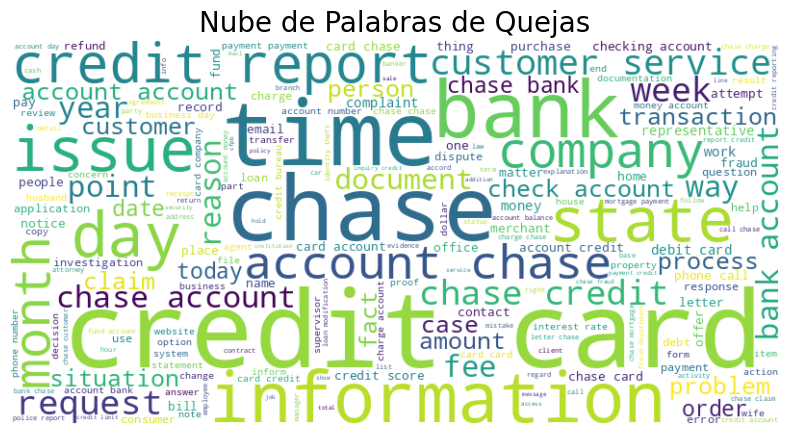

In [ ]:
from wordcloud import WordCloud
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.title('Nube de Palabras de Quejas', fontsize=20)
plt.show()

#Análisis de la Nube de Palabras

"**credit" y "card**": Estas palabras son prominentes, lo que sugiere que muchas de las quejas están relacionadas con las tarjetas de crédito. Esto puede incluir problemas como cargos incorrectos o dificultades con el uso de la tarjeta.
"bank" y "chase": La presencia notable de "bank" y "chase" indica que la mayoría de las quejas provienen de clientes de Chase Bank, lo que resalta la importancia de esta institución en el contexto de las quejas.
"account": Se menciona frecuentemente, lo que sugiere que los problemas pueden estar relacionados con cuentas bancarias, como acceso, gestión o errores en el saldo.
Otras Palabras Relevantes:

**"issue" y "problem"**: Estas palabras indican que los clientes están expresando preocupaciones o dificultades específicas, enfatizando la insatisfacción con el servicio.
**"time," "day," y "month":** Estas palabras podrían señalar que muchos clientes están reportando problemas relacionados con la duración de los procesos o la tardanza en la resolución de sus quejas.
"customer" y "service": La inclusión de estas palabras sugiere que muchos clientes están insatisfechos con el servicio al cliente, lo que puede indicar una falta de respuesta adecuada o soluciones a sus problemas.
Tendencias Generales:

La nube refleja una fuerte conexión entre las quejas y la gestión de cuentas de tarjetas de crédito en Chase Bank. Los clientes parecen tener problemas recurrentes con sus cuentas, la atención al cliente, y la resolución de disputas o cobros.
Las palabras relacionadas con el tiempo (como "day" y "month") pueden indicar frustración relacionada con la duración del proceso de resolución de quejas.
Frases como "credit report" y "transaction" sugieren que algunos problemas pueden estar vinculados a la gestión de crédito y transacciones específicas.
Conclusión
La nube de palabras evidencia un patrón de quejas concentradas en cuestiones relacionadas con tarjetas de crédito y cuentas en Chase Bank, junto con críticas hacia la atención al cliente y tiempos de respuesta. Este análisis visual puede ser útil para los responsables de la entidad financiera, permitiéndoles identificar áreas específicas que requieren atención y mejora para optimizar la experiencia del cliente.

Resumen General
En resumen, este código realiza los siguientes pasos para crear y visualizar una nube de palabras:

Importa la clase WordCloud para generar nubes de palabras.
Combina todas las quejas en un único string y utiliza este texto para crear la nube de palabras, especificando dimensiones y color de fondo.
Configura una figura para mostrar la nube, ajustando su tamaño.
Muestra la nube de palabras, suavizando sus bordes para mejor visualización.
Desactiva los ejes de la figura para una presentación más limpia.
Agrega un título a la visualización.
Renderiza y muestra la figura en pantalla.
En resumen, renderizar implica convertir algo que existe en una forma digital (ya sea datos, modelos o instrucciones de visualización) en una imagen o forma que puede ser visualizada y entendida por los humanos.


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [ ]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).

# Step 1: Combine all complaints into a single string
all_text = ' '.join(df_clean['complaint_clean'])

# Step 2: Tokenize the text into unigrams (words)
unigrams = all_text.split()

# Step 3: Count frequencies of each unigram
unigram_counts = Counter(unigrams)

# Step 4: Get the top 30 most common unigrams
top_30_unigrams = unigram_counts.most_common(30)

# Convert to DataFrame for better readability (optional)
top_30_df = pd.DataFrame(top_30_unigrams, columns=['Unigram', 'Frequency'])

print(top_30_df)

        Unigram  Frequency
0         chase      54326
1       account      47508
2        credit      33512
3          card      30315
4          bank      21892
5       payment      21163
6          time      16036
7        charge      14274
8           day      13193
9         check      12288
10        money      11955
11         loan      10953
12       letter       9641
13  information       9640
14       report       8976
15          fee       8894
16         call       8808
17       number       8630
18  transaction       8589
19        month       8553
20       amount       8424
21         year       8378
22     customer       8160
23     mortgage       8125
24      balance       7769
25      service       7720
26        phone       7622
27      company       7592
28        claim       7407
29        state       7348


Este paso toma la columna complaint_clean del DataFrame df_clean, que se supone contiene las quejas ya limpias (sin caracteres especiales o ruido innecesario). La función **join combina todas estas quejas en una sola cadena**, separando cada queja por un espacio. El resultado es un texto largo que contiene todas las quejas.
Se utiliza **Counter de la biblioteca collections** para contar la frecuencia de cada palabra en la lista unigrams. Counter crea un diccionario donde las claves son las palabras y los valores son las cantidades de veces que cada palabra aparece. El resultado es un objeto Counter que refleja la frecuencia de cada unigram.
El método **most_common(30**) devuelve una lista de las 30 palabras más comunes y sus frecuencias en formato de tupling. Cada tupla contiene una palabra y su correspondiente frecuencia. Esto te da una vista rápida de cuáles son las palabras más frecuentes en las quejas.
En este paso,** conviertes la lista de los 30 unigrams más comunes en un DataFrame de pandas,** lo que te permite tener una representación tabular. Este DataFrame tiene dos columnas: 'Unigram' (la palabra) y 'Frequency' (la cantidad de veces que aparece).

In [ ]:
#Print the top 10 words in the unigram frequency
# Step 4: Get the top 10 most common unigrams
top_10_unigrams = unigram_counts.most_common(10)

# Convert to DataFrame for better readability (optional)
top_10_df = pd.DataFrame(top_10_unigrams, columns=['Unigram', 'Frequency'])

# Print the top 10 unigrams
print(top_10_df)

   Unigram  Frequency
0    chase      54326
1  account      47508
2   credit      33512
3     card      30315
4     bank      21892
5  payment      21163
6     time      16036
7   charge      14274
8      day      13193
9    check      12288


El código esta bien estructurado y hace uso eficiente de las funcionalidades de Counter y pandas para extraer y mostrar los datos relevantes. Si todo está funcionando como esperabas, este código debería proporcionarte una visión clara de las palabras más comunes en las quejas. Si tienes más preguntas o si hay algo más que quieras incluir, ¡házmelo saber!

Descripción: En este paso, estás creando un DataFrame de pandas a partir de la lista de los 10 unigrams más comunes. El DataFrame tiene dos columnas:
Unigram: contiene la palabra (unigram).

In [ ]:
from nltk import bigrams
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
# Step 1: Combine all complaints into a single string
all_text = ' '.join(df_clean['complaint_clean'])

# Step 2: Tokenize the text into words
words = all_text.split()

# Step 3: Generate bigrams from the list of words
bigram_list = list(bigrams(words))

# Step 4: Count frequencies of each bigram
bigram_counts = Counter(bigram_list)

# Step 5: Get the top 30 most common bigrams
top_30_bigrams = bigram_counts.most_common(30)

# Convert to DataFrame for better readability (optional)
top_30_df = pd.DataFrame(top_30_bigrams, columns=['Bigram', 'Frequency'])

# Print the top 30 bigrams
print(top_30_df)

                 Bigram  Frequency
0        (credit, card)      12857
1      (credit, report)       3957
2      (account, chase)       3167
3   (customer, service)       3076
4       (chase, credit)       2921
5      (chase, account)       2723
6       (bank, account)       2465
7    (account, account)       2405
8      (check, account)       2302
9         (chase, bank)       2183
10        (debit, card)       2030
11  (checking, account)       1955
12        (chase, card)       1864
13      (credit, score)       1709
14      (card, account)       1678
15        (phone, call)       1660
16        (card, chase)       1647
17    (account, credit)       1565
18   (payment, payment)       1406
19      (account, bank)       1347
20     (money, account)       1338
21     (interest, rate)       1293
22      (business, day)       1257
23      (phone, number)       1245
24    (account, number)       1182
25      (card, company)       1121
26       (chase, chase)       1113
27    (charge, accou

Tomaremos la columna complaint_clean del DataFrame df_clean, que contiene las quejas limpias. Usando join, combinas todas estas quejas en una sola cadena, separadas por espacios. Esto produce un largo texto con todas las quejas.
Usando el método split(), divides el texto combinado en palabras individuales. El resultado, words, es una lista que contiene todas las palabras que se encuentran en el texto.
Se utilizó la función bigrams de nltk, que toma la lista de palabras words y genera todos los pares adyacentes de palabras (bigramos). Cada bigrama es representado como una tupla de dos palabras. El resultado es una lista llamada bigram_list que contiene todos los bigramas extraídos del texto.Aquí usas Counter de la biblioteca collections para contar la frecuencia de cada bigrama en la lista bigram_list. Esto genera un objeto Counter que actúa como un diccionario, donde las claves son los bigramas (tuplas de palabras) y los valores son sus conteos respectivos.
Se usa Counter de la biblioteca collections para contar la frecuencia de cada bigrama en la lista bigram_list. Esto genera un objeto Counter que actúa como un diccionario, donde las claves son los bigramas (tuplas de palabras) y los valores son sus conteos respectivos.
Descripción: El método most_common(30) devuelve una lista de los 30 bigramas más frecuentes, junto con sus frecuencias. Cada elemento de la lista es una tupla que consiste en un bigrama y su frecuencia.


In [ ]:
#Print the top 10 words in the bigram frequency
# Step 5: Get the top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Convert to DataFrame for better readability (optional)
top_10_df = pd.DataFrame(top_10_bigrams, columns=['Bigram', 'Frequency'])

# Print the top 10 bigrams
print(top_10_df)

                Bigram  Frequency
0       (credit, card)      12857
1     (credit, report)       3957
2     (account, chase)       3167
3  (customer, service)       3076
4      (chase, credit)       2921
5     (chase, account)       2723
6      (bank, account)       2465
7   (account, account)       2405
8     (check, account)       2302
9        (chase, bank)       2183


In [ ]:
from nltk import trigrams
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
# Step 1: Combine all complaints into a single string
all_text = ' '.join(df_clean['complaint_clean'])

# Step 2: Tokenize the text into words
words = all_text.split()

# Step 3: Generate trigrams from the list of words
trigram_list = list(trigrams(words))

# Step 4: Count frequencies of each trigram
trigram_counts = Counter(trigram_list)

# Step 5: Get the top 30 most common trigrams
top_30_trigrams = trigram_counts.most_common(30)

# Convert to DataFrame for better readability (optional)
top_30_df = pd.DataFrame(top_30_trigrams, columns=['Trigram', 'Frequency'])

# Print the top 30 trigrams
print(top_30_df)

                                Trigram  Frequency
0                 (chase, credit, card)       1948
1               (credit, card, account)       1096
2               (credit, card, company)        987
3                 (credit, card, chase)        744
4             (inquiry, credit, report)        522
5                (credit, card, credit)        521
6               (account, credit, card)        488
7                  (card, credit, card)        414
8                (charge, credit, card)        409
9            (chase, customer, service)        392
10             (credit, report, credit)        381
11          (credit, reporting, agency)        381
12           (chase, checking, account)        379
13  (customer, service, representative)        336
14              (credit, card, payment)        304
15            (account, chase, account)        301
16               (chase, bank, account)        291
17            (account, credit, report)        290
18                 (bank, credi

In [ ]:
#Print the top 10 words in the trigram frequency
# Step 5: Get the top 10 most common trigrams
top_10_trigrams = trigram_counts.most_common(10)

# Convert to DataFrame for better readability (optional)
top_10_df = pd.DataFrame(top_10_trigrams, columns=['Trigram', 'Frequency'])

# Print the top 10 trigrams
print(top_10_df)

                      Trigram  Frequency
0       (chase, credit, card)       1948
1     (credit, card, account)       1096
2     (credit, card, company)        987
3       (credit, card, chase)        744
4   (inquiry, credit, report)        522
5      (credit, card, credit)        521
6     (account, credit, card)        488
7        (card, credit, card)        414
8      (charge, credit, card)        409
9  (chase, customer, service)        392


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [ ]:
# Read CSV file into a DataFrame
df_clean = pd.read_csv('complaints_limp.csv')
df_clean['complaint_clean'] = df_clean['complaint_POS_removed']
df_clean

,complaints,complaint_clean,complaint_lemmatized,complaint_POS_removed
0,good morning my name is and i appreciate it if...,morning name stop bank cardmember service ask ...,good morning my name be and I appreciate it if...,morning name stop bank cardmember service ask ...
1,i upgraded my card in and was told by the agen...,card agent anniversary date agent information ...,I upgrade my card in and be tell by the agent ...,card agent anniversary date agent information ...
2,chase card was reported on however fraudulent ...,chase card report application identity consent...,chase card be report on however fraudulent app...,chase card report application identity consent...
3,on while trying to book a ticket i came across...,ticket offer ticket reward card information of...,on while try to book a ticket I come across an...,ticket offer ticket reward card information of...
4,my grand son give me check for i deposit it in...,son chase account fund chase bank account mone...,my grand son give I check for I deposit it int...,son chase account fund chase bank account mone...
...,...,...,...,...
21067,after being a chase card customer for well ove...,chase card customer decade solicitation credit...,after be a chase card customer for well over a...,chase card customer decade solicitation credit...
21068,on wednesday i called chas my visa credit card...,visa credit card provider claim purchase prote...,on wednesday I call chas my visa credit card p...,visa credit card provider claim purchase prote...
21069,i am not familiar with pay and did not underst...,pay risk consumer chase bank app chase year ba...,I be not familiar with pay and do not understa...,pay risk consumer chase bank app chase year ba...
21070,i have had flawless credit for yrs ive had cha...,credit yrs chase credit card chase freedom pro...,I have have flawless credit for yrs I ve have ...,credit yrs chase credit card chase freedom pro...


# **6. Feature Extraction**
Convierta los textos sin procesar en una matriz de características TF-IDF

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [ ]:
df_clean.shape

(21072, 4)

In [ ]:
# Step 1: Check for missing values
print("Missing values in 'complaint_clean':")
print(df_clean['complaint_clean'].isnull().sum())

Missing values in 'complaint_clean':
1


In [ ]:
# Option 1: Drop rows with missing values
df_clean = df_clean.dropna(subset=['complaint_clean'])

In [ ]:
# Write your code here to initialise the TfidfVectorizer

# Step 3: Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Step 4: Fit and transform the data to create the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df_clean['complaint_clean'])

# Convert the TF-IDF matrix to a DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print the resulting TF-IDF DataFrame
print(tfidf_df)

        aa  aarp  abandonment  abatement  abbreviation  abet  abide  ability  \
0      0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
1      0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
2      0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
3      0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
4      0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
...    ...   ...          ...        ...           ...   ...    ...      ...   
21066  0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
21067  0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
21068  0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
21069  0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   
21070  0.0   0.0          0.0        0.0           0.0   0.0    0.0      0.0   

       about  abovementione  ...  your 

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [ ]:
df_clean.reset_index(drop=True, inplace=True)  # Reset index and drop the old index
df_clean['complaint_id'] = df_clean.index + 1  # Create complaint_id starting from 1

In [ ]:
# Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
# Step 4: Create a Document-Term Matrix with tuples of (complaint_id, token_id)
dtm = []
for i in range(tfidf_df.shape[0]):  # Iterate over each complaint
    for j in range(tfidf_df.shape[1]):  # Iterate over each token
        if tfidf_df.iloc[i, j] > 0:  # Only consider non-zero scores
            dtm.append((df_clean['complaint_id'].iloc[i], j, tfidf_df.iloc[i, j]))

# Convert to DataFrame for better readability (optional)
dtm_df = pd.DataFrame(dtm, columns=['complaint_id', 'token_id', 'tfidf_score'])

# Print the resulting Document-Term Matrix
print(dtm_df)


# Guardar el DataFrame en un archivo CSV
dtm_df.to_csv('dtm_df.csv', index=False, encoding='utf-8-sig')

        complaint_id  token_id  tfidf_score
0                  1        38     0.074945
1                  1       125     0.243146
2                  1       372     0.257005
3                  1       529     0.186046
4                  1       905     0.302363
...              ...       ...          ...
645610         21071      5328     0.122302
645611         21071      5605     0.233167
645612         21071      5699     0.124091
645613         21071      6012     0.123346
645614         21071      7011     0.353645

[645615 rows x 3 columns]


In [ ]:
# Read CSV file into a DataFrame
dtm_df = pd.read_csv('dtm_df.csv')

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) es una técnica no supervisada, por lo que no hay etiquetas de temas en los que se entrenará el modelo. La forma en que funciona es que NMF descompone (o factoriza) vectores de alta dimensión en una representación de menor dimensión. Estos vectores de menor dimensión no son negativos, lo que también significa que sus coeficientes no son negativos.

En esta tarea tienes que realizar lo siguiente:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

* Encuentra el mejor número de clústeres
* Aplicar el mejor número para crear grupos de palabras
* Inspeccionar y validar la corrección de cada grupo frente a las quejas (Complaints)
* Corrija las etiquetas si es necesario
* Mapear el grupo de nombres de topicos/clusters

To determine the optimal number of clusters for NMF, you can use techniques like the elbow method or silhouette score.
**Elbow Method**

In [ ]:
from sklearn.decomposition import NMF

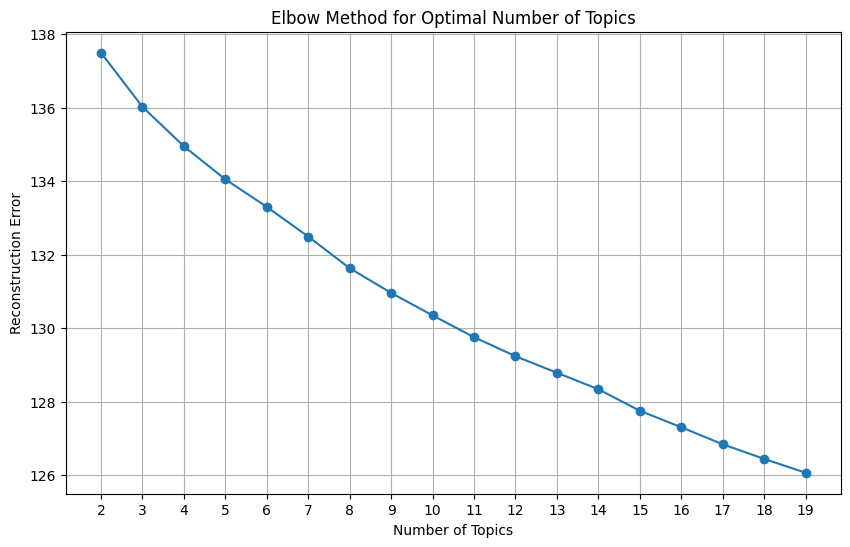

In [ ]:
def plot_elbow_method(tfidf_matrix):
    num_topics = range(2, 20)
    scores = []

    for n in num_topics:
        nmf_model = NMF(n_components=n, random_state=42)
        W = nmf_model.fit_transform(tfidf_matrix)
        H = nmf_model.components_

        # Calculate reconstruction error (using Frobenius norm)
        score = nmf_model.reconstruction_err_
        scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.plot(num_topics, scores, marker='o')
    plt.title('Elbow Method for Optimal Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Reconstruction Error')
    plt.xticks(num_topics)
    plt.grid()
    plt.show()

plot_elbow_method(tfidf_matrix)

**def plot_elbow_method(tfidf_matrix):** Esta línea define una función llamada plot_elbow_method, que toma un parámetro: tfidf_matrix. Este parámetro es probablemente una matriz que representa la frecuencia de términos en un conjunto de documentos, procesada a través de TF-IDF (Term Frequency-Inverse Document Frequency).

**num_topics:** Se define un rango que va desde 2 hasta 19 (inclusive). Este rango determinará cuántos temas diferentes se considerarán para el modelo.
scores: Se inicializa una lista vacía que se utilizará para almacenar los puntajes de error de reconstrucción para cada número de temas.

**Bucle for n in num_topics:** Este bucle itera sobre cada número de temas (2 a 19).
NMF(n_components=n, random_state=42): Se crea un modelo NMF (Non-negative Matrix Factorization) con n componentes (temas). random_state=42 asegura que los resultados sean reproducibles.
W = nmf_model.fit_transform(tfidf_matrix): Se ajusta el modelo a la tfidf_matrix y se obtiene la matriz W, que representa las relaciones entre los documentos y los temas. H = nmf_model.components_: Se obtiene la matriz H que representa los temas y sus contribuciones a los términos.
**score = nmf_model.reconstruction_err_**: Se calcula el error de reconstrucción del modelo, que mide qué tan bien el modelo NMF ha podido aproximar la matriz de entrada. Este error se basa en la norma de Frobenius.
scores.append(score): Se agrega el puntaje del error de reconstrucción a la lista scores.
**plt.figure(figsize=(10, 6))**: Se crea una nueva figura para la gráfica con un tamaño de 10x6 pulgadas.
plt.plot(num_topics, scores, marker='o'): Se grafica la relación entre el número de temas y los puntajes de error de reconstrucción. Se utiliza un marcador tipo "o" para los puntos en la gráfica.
plt.title(...), plt.xlabel(...), plt.ylabel(...): Se definen el título y las etiquetas de los ejes de la gráfica.
plt.xticks(num_topics): Se establecen las marcas del eje x según los números de temas considerados.
plt.grid(): Se añade una cuadrícula a la gráfica para mejorar la legibilidad.
plt.show(): Se muestra la gráfica generada.

**Se llama a la función plot_elbow_method** y se le pasa la matriz tfidf_matrix, lo que inicia todo el proceso anterior: entrenamiento del modelo, cálculo de errores y visualización de resultados.

# **Conclusión**

Sí hay mejora al aumentar los temas, pero a partir de un cierto punto (9-11), cada tema adicional proporciona una mejora menor en la calidad del modelo.
Este es el punto óptimo para decidir cuántos temas utilizar. Así que, aunque puedes seguir añadiendo temas, no necesariamente obtendrás mejoras que justifiquen la complejidad adicional del modelo.

**Silhouette Score**
You can also calculate silhouette scores for different numbers of topics:

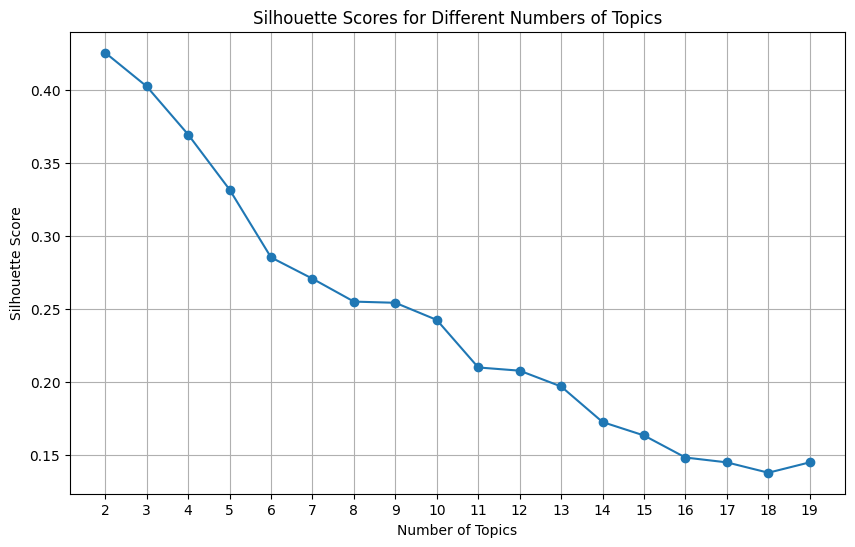

In [ ]:
from sklearn.metrics import silhouette_score
def calculate_silhouette_scores(tfidf_matrix):
    num_topics = range(2, 20)
    silhouette_scores = []

    for n in num_topics:
        nmf_model = NMF(n_components=n, random_state=42)
        W = nmf_model.fit_transform(tfidf_matrix)

        # Calculate silhouette score
        if W.shape[0] > 1:
            score = silhouette_score(W, np.argmax(W, axis=1))
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)  # Not enough samples to calculate

    plt.figure(figsize=(10, 6))
    plt.plot(num_topics, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Numbers of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Silhouette Score')
    plt.xticks(num_topics)
    plt.grid()
    plt.show()

calculate_silhouette_scores(tfidf_matrix)

**Calculate_silhouette_scores** que toma como entrada una matriz TF-IDF (tfidf_matrix), que representa los documentos en un formato que puede ser analizado.

**num_topics: **Se establece un rango que va de 2 a 19, indicando la cantidad de temas a evaluar.

**silhouette_scores:** Se inicializa una lista vacía donde se almacenarán los puntajes de silueta correspondientes a cada número de temas.

**Iteración Sobre el Número de Temas:** El bucle for itera sobre cada número n en num_topics.

**Creación del Modelo NMF:** Para cada n, se crea un modelo NMF con n_components=n. El argumento random_state=42 asegura que los resultados sean reproducibles.

**Ajuste y Transformación**: Se ajusta el modelo NMF a la matriz TF-IDF y se obtiene la matriz W, que representa la relación entre los documentos y los temas.

**Verificación de Muestras**: Se verifica si hay más de una muestra (W.shape[0] > 1).

**Cálculo del Puntaje:**
Si hay suficientes muestras, se calcula el puntaje de silueta utilizando silhouette_score(W, np.argmax(W, axis=1)). Aquí:
W es la matriz de características donde cada fila corresponde a un documento.
np.argmax(W, axis=1) obtiene el índice del tema que tiene la mayor participación para cada documento, lo que se utiliza como agrupamiento.
Añadir a la Lista: Se añade el puntaje de silueta a la lista silhouette_scores.
Manejo de Insuficiencia de Muestras: Si no hay suficientes muestras, se añade -1 a silhouette_scores indicando que no se puede calcular.

**Creación de la Gráfica:** Se inicializa una figura de 10x6 pulgadas para la visualización.

**Trazado de la Gráfica:** Se grafica el número de temas frente a los puntajes de silueta, utilizando marcadores en los puntos.

**Etiquetas de Ejes y Título: **Se establece el título del gráfico y se añaden etiquetas para los ejes x e y.

Marcas del Eje X: Se ajustan las marcas del eje x para que coincidan con los números de temas.
Cuadrícula: Se añade una cuadrícula para mejorar la legibilidad.
Mostrar la Gráfica: Finalmente, se muestra la gráfica generada.
Se llama a la función calculate_silhouette_scores, pasando la matriz TF-IDF como argumento, lo que inicia todo el proceso descrito.

# **Conclusión**
Este código permite evaluar cómo varía la calidad de la agrupación de documentos en función del número de temas elegidos al aplicar NMF, utilizando el índice de silueta como métrica. Un puntaje de silueta más alto indica una mejor separación entre los grupos formados por el modelo.

**Número Óptimo de Temas:** A partir de esta gráfica, podría considerarse que entre 2 y 3 temas podría ser el número óptimo para una buena separación de agrupaciones. Más temas parecen complicar la separación.

**Necesidad de Revisión:** La disminución general del puntaje sugiere que podría ser útil revisar la calidad de los datos o explorar otras técnicas de modelado y comparación con otros métodos de agrupación.

**Contexto Adicional:** Sería valioso complementar este análisis con una evaluación cualitativa de los temas generados, para ver si esto coincide con la interpretación humana de los grupos que se están formando.


**Apply NMF with the Best Number of Clusters**
Once you determine the optimal number of clusters (let's say it's n), apply NMF:

In [ ]:
# Assuming n is determined to be the best number of topics
n = 5  # Replace with your optimal number from previous steps

nmf_model = NMF(n_components=n, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)  # Document-topic matrix
H = nmf_model.components_  # Topic-word matrix

**La función fit_transform() **se aplica a la matriz TF-IDF (tfidf_matrix):

**Entrenamiento:** El modelo ajusta sus parámetros a los datos, identificando patrones que permiten representar la matriz TF-IDF mediante temas.
Transformación: Se transforma la matriz de entrada (TF-IDF) en una nueva matriz (W). Esta matriz es W, la matriz de documentos-temas donde cada fila representa un documento y cada columna un tema. Los valores indican la fuerza o la importancia de cada tema en cada documento.
Se accede a la propiedad components_ del modelo NMF, que contiene la matriz de temas-palabras (H):
Cada fila de la matriz H representa un tema y cada columna contiene los pesos (o importancia) de las palabras en ese tema. Las palabras con pesos más altos en una fila son las más representativas de ese tema.
Resumen
En resumen, este código establece un modelo NMF con 5 temas, entrena el modelo utilizando la matriz TF-IDF de un conjunto de documentos, y produce dos matrices:

W: que relaciona documentos con temas.
H: que relaciona temas con palabras.
Esta descomposición permite una comprensión más rápida y efectiva de la estructura temática dentro de los documentos analizados.

**Inspect & Validate Clusters**
You can inspect the top words in each cluster to understand what topics they represent:

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10  # Adjust based on how many top words you want to see
display_topics(nmf_model, vectorizer.get_feature_names_out(), no_top_words)

Topic 1:
account check bank money fund chase deposit branch day checking
Topic 2:
card credit chase balance account limit score year point interest
Topic 3:
payment loan mortgage chase home month modification interest time year
Topic 4:
report inquiry credit company information reporting debt identity account theft
Topic 5:
charge chase dispute transaction claim merchant fraud fee purchase email


La función acepta tres parámetros:

**model:** El modelo NMF entrenado (o cualquier modelo con una propiedad components_ que contenga los temas).
feature_names: Una lista de las características (palabras) que corresponden a las columnas de la matriz de entrada (por ejemplo, la matriz TF-IDF).
no_top_words: Un entero que especifica cuántas de las palabras más relevantes por tema deseas mostrar.
**for topic_idx, topic in enumerate(model.components_)**se esta iterando sobre los componentes del modelo, que son las representaciones de los temas. La función enumerate proporciona tanto el índice del tema (topic_idx) como los valores del tema (topic).Se imprime el número del tema (incrementando el índice por uno para que empiece en 1 en lugar de 0).
topic.argsort(): Esto devuelve los índices que ordenarían el arreglo topic que representa el peso de cada palabra en el tema. Los índices están ordenados de menor a mayor.
**[:-no_top_words - 1:-1]:** Este slicing utiliza el resultado de argsort para obtener los índices de las palabras en orden descendente, comenzando desde el final (palabras con mayor peso) y avanzando hacia el inicio. Al usar -1, se obtienen las no_top_words palabras más importantes.
**[feature_names[i] for i in ...]**: Esta lista por comprensión toma los índices obtenidos de arriba y los utiliza para extraer las palabras correspondientes de feature_names.
" ".join(...): Finalmente, las palabras se unen en una sola cadena, separadas por espacios, para imprimir.
**Conclusión**
En resumen, esta función se utiliza para presentar los temas que ha aprendido un modelo de descomposición de matrices, mostrando las palabras más significativas para cada tema. Es una forma efectiva de interpretar y visualizar los resultados del modelado de temas.

**Correct Labels and Map Clusters to Topics**
Based on your inspection of the topics generated by NMF, you may want to manually label these topics. Create a mapping dictionary:

In [ ]:
# Define the mapping of topic indices to descriptive labels
topic_labels = {
    0: "Credit card/Prepaid Card",
    1: "Bank account services",
    2: "Theft/Dispute reporting",
    3: "Mortgages/loans",
    4: "Others"
}

# Map the topics to the complaints
df_clean['topic'] = np.argmax(W, axis=1)  # Get the index of the highest topic score for each complaint
df_clean['topic_label'] = df_clean['topic'].map(topic_labels)  # Map topic indices to labels

# Display the updated DataFrame with complaints and their assigned topics
print(df_clean[['complaint_id', 'complaint_clean', 'topic', 'topic_label']])

       complaint_id                                    complaint_clean  topic  \
0                 1  morning name stop bank cardmember service ask ...      0   
1                 2  card agent anniversary date agent information ...      1   
2                 3  chase card report application identity consent...      3   
3                 4  ticket offer ticket reward card information of...      3   
4                 5  son chase account fund chase bank account mone...      0   
...             ...                                                ...    ...   
21066         21067  chase card customer decade solicitation credit...      1   
21067         21068  visa credit card provider claim purchase prote...      4   
21068         21069  pay risk consumer chase bank app chase year ba...      4   
21069         21070  credit yrs chase credit card chase freedom pro...      1   
21070         21071  year account order line credit account payment...      2   

                    topic_l

Esta sección crea un diccionario llamado topic_labels. Las claves (0 a 4) representan diferentes índices de temas, cada uno correspondiente a una etiqueta descriptiva que clasifica tipos de quejas relacionadas con servicios financieros.
quí, W probablemente es un array 2D de NumPy donde cada fila corresponde a una queja y cada columna corresponde a una puntuación de tema. La función np.argmax(W, axis=1) se utiliza para determinar el índice de la puntuación más alta en cada fila (es decir, en cada queja). Esto significa que para cada queja, se determina a qué tema está más relacionada en función de las puntuaciones en W, y se asigna este índice a la nueva columna topic en el DataFrame df_clean.

Asignación de Índices de Tema a Etiquetas:

python
df_clean['topic_label'] = df_clean['topic'].map(topic_labels)  # Mapear los índices de los temas a etiquetas  
En esta línea, el código toma la columna topic, que contiene índices (0 a 4), y mapea estos índices a sus respectivas etiquetas descriptivas utilizando el diccionario topic_labels. Las etiquetas resultantes se almacenan en una nueva columna llamada topic_label en el mismo DataFrame.

Resumen
El propósito general de este código es categorizar las quejas en un DataFrame (df_clean) identificando el tema más relevante según las puntuaciones del array W, y luego asignando etiquetas comprensibles a estas categorías para facilitar su comprensión.


In [ ]:
# Guardar el DataFrame en un archivo CSV
df_clean.to_csv('datatopic.csv', index=False, encoding='utf-8-sig')

## **7. Manual Topic Modeling**
Debe adoptar el enfoque de prueba y error para encontrar la mejor cantidad de topicos para su modelo NMF.

El único parámetro que se requiere es el número de componentes, es decir, el número de topicos que queremos. Este es el paso más crucial en todo el proceso de modelado de topicos y afectará en gran medida la calidad de sus topicos finales.

In [ ]:
# Initialize the TfidfVectorizer without stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=None)  # No stop words removed

# Fit the vectorizer to the 'complaint_clean' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['complaint_clean'])

n_components = 5  # Set the number of topics

#keep the random_state =40
# Initialize and fit the NMF model
nmf_model = NMF(n_components=n_components, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)  # Document-topic matrix
H = nmf_model.components_  # Topic-word matrix

# Define a function to display the top words for each topic
def display_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        # Get the indices of the top words for this topic
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        # Get the corresponding feature names (words)
        top_words = [feature_names[i] for i in top_word_indices]
        print(" ".join(top_words))
        print()  # Print a newline for better readability

# Number of top words to display
n_top_words = 15

# Call the function to display the top words for each topic
display_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words)


Topic 1:
account check bank money fund chase deposit branch day checking business number transfer customer transaction

Topic 2:
card credit chase balance account limit score year point offer month interest purchase application reason

Topic 3:
payment loan mortgage chase home month modification interest time year rate balance property amount statement

Topic 4:
report inquiry credit company information reporting identity debt account theft score letter date inquire file

Topic 5:
charge chase dispute transaction claim merchant fraud fee purchase email amount service call refund time



Se crea una instancia de TfidfVectorizer, tfidf_vectorizer = TfidfVectorizer(stop_words=None)    
Se crea una instancia de TfidfVectorizer, que es una herramienta de procesamiento de texto utilizada para transformar documentos de texto en una matriz de características. La opción stop_words=None indica que no se eliminarán palabras vacías (como "y", "el", "de") durante el proceso de vectorización.

2. Ajuste del Vectorizer a la Columna de Quejas
python
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['complaint_clean'])  
En esta línea, el TfidfVectorizer se ajusta (fit) y transforma (transform) la columna complaint_clean del DataFrame df_clean, creando una matriz TF-IDF (tfidf_matrix). Cada fila de esta matriz representa una queja, y cada columna representa una palabra única del vocabulario, con los valores correspondientes al peso TF-IDF de cada palabra en el documento.

3. Definición del Número de Temas
python
n_components = 5  # Establecer el número de temas  
Aquí se especifica que se desean extraer 5 temas de la colección de quejas.

4. Inicialización y Ajuste del Modelo NMF
python
nmf_model = NMF(n_components=n_components, random_state=42)  
W = nmf_model.fit_transform(tfidf_matrix)  # Matriz documento-tema  
H = nmf_model.components_  # Matriz tema-palabra  
Se inicializa el modelo NMF (Non-negative Matrix Factorization) con 5 componentes (n_components=5). random_state=42 asegura que el resultado sea reproducible. Luego, se ajusta el modelo al tfidf_matrix.

W se convierte en la matriz documento-tema, donde cada fila representa una queja y cada columna representa la intensidad con la que esa queja está relacionada con cada uno de los 5 temas.
H se convierte en la matriz tema-palabra, que indica las palabras más importantes asociadas a cada tema.
5. Definición de la Función para Mostrar las Principales Palabras
python
def display_top_words(model, feature_names, n_top_words):  
    for topic_idx, topic in enumerate(model.components_):  
        print(f"Tema {topic_idx + 1}:")  
        # Obtener los índices de las palabras principales para este topic  
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]  
        # Obtener los nombres de las características correspondientes (palabras)  
        top_words = [feature_names[i] for i in top_word_indices]  
        print(" ".join(top_words))  
        print()  # Imprimir una nueva línea para mejor legibilidad  
Esta función toma como argumentos un modelo de NMF, los nombres de las características (palabras) y el número de palabras principales a mostrar. Para cada tema, imprime el índice del tema y las palabras más relevantes, que se obtienen ordenando los pesos del tema (topic.argsort()).

6. Número de Palabras Principales a Mostrar
python
n_top_words = 15  
Aquí se define que se mostrarán las 15 palabras más importantes para cada tema.

7. Llamada a la Función para Mostrar las Palabras Principales
python
display_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words)  
Finalmente, se llama a la función display_top_words, pasando el modelo NMF, los nombres de las características obtenidos a partir del vectorizador (las palabras del vocabulario), y el número de palabras que se quieren mostrar.

Resumen
Este código en su conjunto realiza la vectorización de un conjunto de quejas utilizando el método TF-IDF, y luego emplea NMF para descubrir temas en los datos. Finalmente, muestra las palabras más representativas para cada uno de esos temas, ayudando a interpretar qué significan los temas detectados en relación con las quejas presentadas.

Si tienes más preguntas o necesitas más aclaraciones sobre alguna parte del código, ¡estaré encantado de ayudarte!

0
Mejora
que es una herramienta de procesamiento de texto utilizada para transformar documentos de texto en una matriz de características. La opción stop_words=None indica que no se eliminarán palabras vacías (como "y", "el", "de") durante el proceso de vectorización.

In [ ]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
# Assign the best topic for each complaint
df_clean['best_topic'] = W.argmax(axis=1)  # Get index of the max value in each row

# Display the DataFrame with complaint IDs and their assigned best topics
print(df_clean[['complaint_clean', 'best_topic']])

                                         complaint_clean  best_topic
0      morning name stop bank cardmember service ask ...           0
1      card agent anniversary date agent information ...           1
2      chase card report application identity consent...           3
3      ticket offer ticket reward card information of...           3
4      son chase account fund chase bank account mone...           0
...                                                  ...         ...
21066  chase card customer decade solicitation credit...           1
21067  visa credit card provider claim purchase prote...           4
21068  pay risk consumer chase bank app chase year ba...           4
21069  credit yrs chase credit card chase freedom pro...           1
21070  year account order line credit account payment...           2

[21071 rows x 2 columns]


In [ ]:
#Assign the best topic to each of the cmplaints in Topic Column

# Assign the best topic for each complaint to the 'Topic' column
df_clean['Topic'] = W.argmax(axis=1)  # Get index of the max value in each row

# Display the DataFrame with complaints and their assigned topics
print(df_clean[['complaint_clean', 'Topic']])

                                         complaint_clean  Topic
0      morning name stop bank cardmember service ask ...      0
1      card agent anniversary date agent information ...      1
2      chase card report application identity consent...      3
3      ticket offer ticket reward card information of...      3
4      son chase account fund chase bank account mone...      0
...                                                  ...    ...
21066  chase card customer decade solicitation credit...      1
21067  visa credit card provider claim purchase prote...      4
21068  pay risk consumer chase bank app chase year ba...      4
21069  credit yrs chase credit card chase freedom pro...      1
21070  year account order line credit account payment...      2

[21071 rows x 2 columns]


In [ ]:
#Print the first 5 Complaint for each of the Topics
# Group by 'Topic' and take the first 5 complaints for each topic
top_complaints_per_topic = df_clean.groupby('Topic').head(5)

# Sort the resulting DataFrame by 'Topic' for better readability
top_complaints_per_topic = top_complaints_per_topic.sort_values('Topic')

# Display the result
print(top_complaints_per_topic[['complaint_clean', 'Topic']])

                                      complaint_clean  Topic
0   morning name stop bank cardmember service ask ...      0
10                       mishandle account chase auto      0
6   notice account debit card branch customer serv...      0
4   son chase account fund chase bank account mone...      0
12  account code bonus term account deposit bonus ...      0
14  chase card decline catering order place brothe...      1
25  reward point month reward account bonus chase ...      1
22  roommate chase debit card driver license money...      1
1   card agent anniversary date agent information ...      1
21  citizen scamme company time share company refu...      1
24  purchase payment payment closing date statemen...      2
23                loan modification chase payment doc      2
32  loan title chase time resolution time state re...      2
7   summer month decline income employment month p...      2
30  wire chase branch reinstatement amount order f...      2
3   ticket offer ticket 

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [ ]:
#Create the dictionary of Topic names and Topics

# Define the mapping of topic indices to descriptive names
topic_names = {
    0: "Bank Account services",
    1: "Credit card or prepaid card",
    2: "Theft/Dispute Reporting",
    3: "Mortgage/Loan",
    4: "Others"
}

# Assign the topic names to a new column 'Topic_Name' based on the 'Topic' column
df_clean['Topic_name'] = df_clean['Topic'].map(topic_names)

# Display the DataFrame with complaints and their assigned topic names
print(df_clean[['complaint_clean', 'Topic', 'Topic_name']])

                                         complaint_clean  Topic  \
0      morning name stop bank cardmember service ask ...      0   
1      card agent anniversary date agent information ...      1   
2      chase card report application identity consent...      3   
3      ticket offer ticket reward card information of...      3   
4      son chase account fund chase bank account mone...      0   
...                                                  ...    ...   
21066  chase card customer decade solicitation credit...      1   
21067  visa credit card provider claim purchase prote...      4   
21068  pay risk consumer chase bank app chase year ba...      4   
21069  credit yrs chase credit card chase freedom pro...      1   
21070  year account order line credit account payment...      2   

                        Topic_name  
0            Bank Account services  
1      Credit card or prepaid card  
2                    Mortgage/Loan  
3                    Mortgage/Loan  
4         

## Supervised model to predict any new complaints to the relevant Topics.

Hasta ahora ha creado el modelo para crear los temas para cada queja. Entonces, en la siguiente sección, los utilizará para clasificar cualquier queja nueva.

Dado que utilizará la técnica de aprendizaje supervisado, tenemos que convertir los nombres de los temas en números (las matrices numpy solo entienden los números)

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [ ]:
from sklearn.model_selection import train_test_split
# Create a dictionary for topic names
topic_names = {
    0: "Bank Account services",
    1: "Credit card or prepaid card",
    2: "Theft/Dispute Reporting",
    3: "Mortgage/Loan",
    4: "Others"
}

# Create a new DataFrame with relevant columns
training_data = df_clean[['complaint_clean', 'Topic']].copy()

# Replace Topic indices with Topic names
training_data['Topic'] = training_data['Topic'].map(topic_names)

# Rename the complaint column to 'complaint_what_happened'
training_data.rename(columns={'complaint_clean': 'complaint_what_happened'}, inplace=True)

# Display the new training data
print(training_data.head())

# Step 3: Create Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the complaints to get word counts
word_counts = count_vectorizer.fit_transform(training_data['complaint_what_happened'])

# Step 4: Transform word counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(word_counts)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, training_data['Topic'], test_size=0.3, random_state=42)

# Display shapes of training and testing sets
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


                             complaint_what_happened  \
0  morning name stop bank cardmember service ask ...   
1  card agent anniversary date agent information ...   
2  chase card report application identity consent...   
3  ticket offer ticket reward card information of...   
4  son chase account fund chase bank account mone...   

                         Topic  
0        Bank Account services  
1  Credit card or prepaid card  
2                Mortgage/Loan  
3                Mortgage/Loan  
4        Bank Account services  
Training set shape: (14749, 15812), Training labels shape: (14749,)
Testing set shape: (6322, 15812), Testing labels shape: (6322,)


**Definición de un diccionario para nombres de tópicos (topic_names):**

Se crea un diccionario para mapear los índices numéricos de la columna Topic a nombres descriptivos. Esto facilita la interpretación de los resultados al trabajar con los datos.

**Creación y preparación del DataFrame training_data:**

Se seleccionan dos columnas de df_clean: complaint_clean (texto procesado de quejas) y Topic (categoría asignada a cada queja).
La columna Topic se actualiza utilizando el diccionario topic_names para reemplazar los índices numéricos con los nombres descriptivos.
La columna complaint_clean se renombra a complaint_what_happened, haciéndola más representativa de su propósito.
**Visualización inicial del DataFrame procesado:**

Se imprimen las primeras cinco filas del DataFrame training_data para confirmar los cambios realizados.
**Vectorización del texto con CountVectorizer:**

**Utilizando CountVectorizer**, el texto de la columna complaint_what_happened se convierte en una matriz dispersa donde cada fila representa una queja y cada columna representa una palabra única. Los valores son la frecuencia de aparición de cada palabra en el texto.
Transformación a representación TF-IDF:

Se utiliza** TfidfTransformer **para convertir la matriz de frecuencias en una representación TF-IDF (Term Frequency-Inverse Document Frequency), que ajusta la importancia de las palabras basándose en su frecuencia en todos los documentos (menos peso a palabras comunes).
División del conjunto de datos en entrenamiento y prueba:

**Se divide el conjunto de datos en dos partes:**
X_train y y_train: Datos y etiquetas para entrenamiento (70% de los datos).
X_test y y_test: Datos y etiquetas para prueba (30% de los datos).
La división es reproducible gracias al uso de random_state=42.
Visualización de las formas de los conjuntos resultantes:

**Se imprimen las formas (dimensiones) **de los conjuntos de datos de entrenamiento y prueba para confirmar la correcta separación.
# **Conclusión**
Este código realiza un procesamiento de texto sistemático y prepara los datos para el análisis de clasificación en tareas de procesamiento de lenguaje natural (NLP). Las etapas principales incluyen:

**Limpieza y preparación de datos**:

Conversión de datos categóricos y texto a un formato adecuado para análisis.

**Vectorización y transformación TF-IDF:**

Representación del texto como datos numéricos, capturando la importancia relativa de palabras dentro de las quejas.

**División en entrenamiento y prueba:**

Configuración de los datos para entrenamiento y evaluación de modelos de aprendizaje automático.

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [ ]:
# Write your code here to build any 3 models and evaluate them using the required metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Assuming training_data is already created with 'complaint_what_happened' and 'Topic'

# Step 1: Create Count Vectorizer and TF-IDF representation
count_vectorizer = CountVectorizer()
word_counts = count_vectorizer.fit_transform(training_data['complaint_what_happened'])
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(word_counts)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, training_data['Topic'], test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Step 3: Train models and evaluate
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score']
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display results
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.965834   0.965909  0.965834  0.965785
Decision Tree        0.823790   0.823665  0.823790  0.823627
Random Forest        0.872509   0.873364  0.872509  0.871879
Naive Bayes          0.766688   0.780771  0.766688  0.756351


**El código procesa datos textuales para entrenar y evaluar modelos de clasificación.** Primero, convierte las quejas en texto de la columna complaint_what_happened en una representación numérica usando CountVectorizer para crear una matriz de frecuencias y luego la transforma en una matriz TF-IDF con TfidfTransformer, ajustando la importancia de las palabras según su frecuencia en el conjunto de datos. Posteriormente, divide los datos en conjuntos de entrenamiento y prueba, utilizando el 70% para entrenamiento y el 30% para evaluación, garantizando reproducibilidad con un random_state.

**Se inicializan cuatro modelos de clasificación:** regresión logística, árbol de decisión, bosque aleatorio y Naive Bayes. Cada modelo se entrena con los datos de entrenamiento y se evalúa con los datos de prueba. Para la evaluación, se calculan métricas clave como la precisión (accuracy), precisión ponderada (precision), sensibilidad (recall) y puntaje F1 (F1-Score) utilizando las etiquetas reales y las predicciones generadas por cada modelo. Los resultados se almacenan en un diccionario y se convierten a un DataFrame para facilitar su análisis y comparación.

**Este enfoque permite determinar el rendimiento de cada modelo y seleccionar el mejor según las métricas calculadas**. El DataFrame resultante muestra un resumen tabular de las métricas clave, proporcionando una base clara para identificar el modelo más adecuado para clasificar las quejas en sus respectivas categorías.

**Interpretación de los resultados**

**Logistic Regression**:

Este modelo tiene el mejor desempeño general con una precisión (accuracy) del 96.58%, lo que indica que predice correctamente la categoría de las quejas en casi todos los casos.
Las métricas Precision (96.59%), Recall (96.58%) y F1-Score (96.58%) están muy equilibradas, lo que refleja un rendimiento consistente en todas las clases. Este modelo es confiable tanto para identificar correctamente las categorías como para minimizar los falsos positivos.

**Decision Tree:**

Tiene un desempeño significativamente más bajo con una precisión del 82.37%, lo que indica un mayor margen de error en las predicciones.
Las métricas Precision (82.37%), Recall (82.37%) y F1-Score (82.36%) son consistentes pero inferiores a las de otros modelos. Esto sugiere que el modelo puede estar sobreajustándose a los datos de entrenamiento.
**Random Forest:**

Este modelo logra una precisión del 87.25%, que es mejor que el árbol de decisión pero notablemente menor que la regresión logística.
Aunque Precision (87.34%) y F1-Score (87.18%) son ligeramente superiores a la precisión, el rendimiento general aún queda por debajo del mejor modelo. Esto indica que el bosque aleatorio mejora sobre el árbol de decisión pero no alcanza el nivel de la regresión logística.

**Naive Bayes:**

Es el modelo con el desempeño más bajo, con una precisión del 76.67%.
Sus métricas Precision (78.08%), Recall (76.67%) y F1-Score (75.63%) son las más bajas entre los modelos probados. Esto es esperado, ya que Naive Bayes hace suposiciones fuertes (independencia de características) que no siempre se cumplen en datos textuales.


# **8. Conclusiones finales**
1. La correcta disposición de los datos de texto provenientes de los tickets de atención al cliente fue un paso fundamental para garantizar la calidad del análisis posterior. La organización estructurada de los datos permitió una transición eficiente hacia las etapas de preprocesamiento y análisis, estableciendo una base sólida para el desarrollo del modelo. Sin embargo es importante considerar que se desecharon casi el 30% de los registros del conjunto de datos porque tenían la columna de análisis “complaint” en blanco.

2. La implementación de técnicas de limpieza como eliminación de ruido, tokenización, lematización y filtrado de palabras irrelevantes resultó crucial para preparar los datos de texto “complaint” en un formato uniforme y procesable. Este paso aseguró que las características extraídas fueran representativas del contenido de los tickets y no estuvieran sesgadas por información irrelevante o ruido textual.

3. El análisis exploratorio permitió comprender las características principales de las quejas, identificando patrones en la frecuencia de palabras y términos comunes en los datos. Esta etapa proporcionó insights iniciales sobre la naturaleza de los problemas planteados por los clientes, ayudando a alinear los enfoques de modelado con las características del conjunto de datos.

4. El uso de representaciones TF-IDF fue clave para transformar los datos textuales en un formato numérico adecuado para el modelado (vectorización). Esta técnica destacó las palabras más relevantes en cada ticket en relación con su frecuencia global, asegurando que el modelo se enfocara en términos significativos para la clasificación de los temas.

5. La factorización de matrices no negativas (NMF) identificó cinco temas principales relacionados con productos y servicios financieros: tarjetas de crédito/prepago, servicios de cuentas bancarias, reportes de robo, hipotecas/préstamos y otros. Este enfoque no supervisado permitió una segmentación inicial de los tickets, facilitando su posterior clasificación mediante técnicas supervisadas.

6. Se diseñaron y probaron varios modelos de aprendizaje supervisado (Regresión Logística, Árbol de Decisión, Random Forest y Naive Bayes) para clasificar los tickets en las categorías identificadas. Entre estos, la Regresión Logística mostró el mejor rendimiento, alcanzando una exactitud del 96.58%, junto con altos valores de precisión, recall y F1-score.

7. La Regresión Logística fue seleccionada como el modelo final debido a su desempeño superior en todas las métricas relevantes, además de su eficiencia computacional e interpretabilidad. Este modelo demostró ser adecuado para la clasificación de tickets en tiempo real, cumpliendo con el objetivo del proyecto.

8. En caso de que se diera la implementación del modelo propuesto, éste proporcionará a la empresa financiera una herramienta robusta para automatizar la clasificación de quejas de los clientes. Esto optimiza los tiempos de respuesta, reduce la carga de trabajo manual y mejora la experiencia del cliente. Además, el enfoque propuesto puede ser actualizado con nuevos datos para mantener su relevancia y efectividad a lo largo del tiempo.
